In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import applications,activations
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras import optimizers,utils
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization,ZeroPadding2D
from keras.layers import Convolution2D, Activation,MaxPooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
from numpy import unique
from sklearn.preprocessing import LabelEncoder
from random import shuffle
import cv2
import imageio
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
# import the module
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from numpy import argmax
from sklearn.metrics import r2_score
import tensorflow as tf
import numpy as np # linear algebra
from sklearn.metrics import r2_score

# classification mlp model for the abalone dataset
from numpy import unique
from numpy import argmax
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import imageio
import os
import seaborn as sns
from PIL import Image
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization, Input
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
import math  

from tensorflow.keras.utils import plot_model

In [6]:
# changing dir and loading images in the folder

filepath = "C:\\Users\\CyberOps\\FACE2"
os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)

11503

11503
18: 1365
28: 417
24: 439
30: 818
19: 821
21: 735
20: 1467
15: 542
26: 280
25: 938
17: 442
11: 137
22: 640
10: 283
23: 495
14: 193
16: 354
27: 438
29: 270
13: 297
12: 132


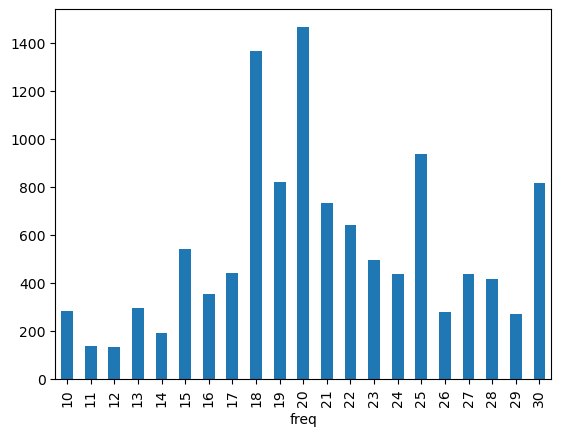

,freq
0,18
1,28
2,24
3,30
4,18


In [8]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [9]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

C:\Users\CyberOps\AppData\Local\Temp\ipykernel_11824\2699070946.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ages = pd.Series(ages, name='Age').astype(np.int)


In [10]:
df.head()


,freq
0,18
1,28
2,24
3,30
4,18


In [10]:
df_age = pd.DataFrame({'Ages': ages})

In [11]:
df_age.shape

(11503, 1)

Age: 26


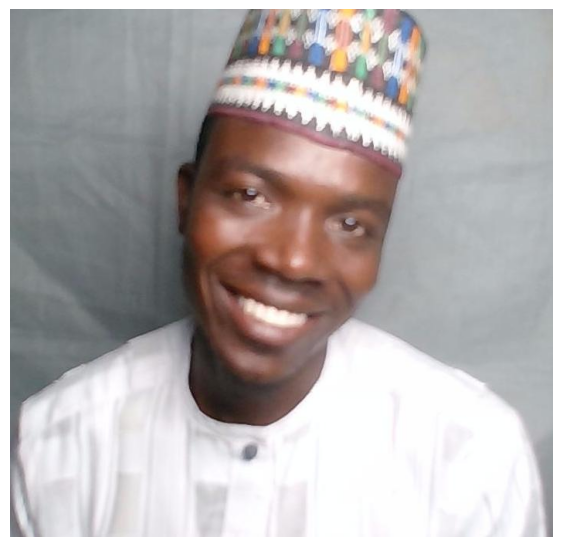

In [11]:
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

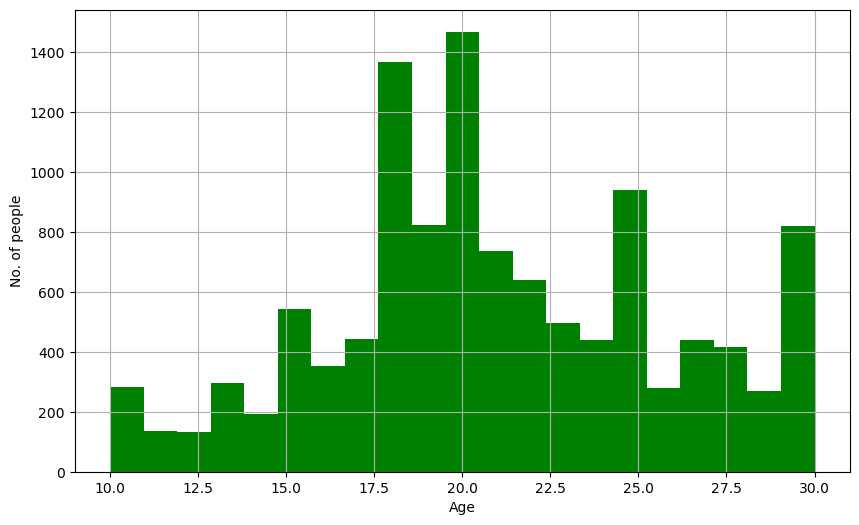

In [12]:

df = ages.to_frame(name="age")

df['age'].hist(bins=df['age'].nunique(),color='g',figsize=(10,6))  

# Pretty obvious that a large chunk of population in training data is from 20 to 60. Sort of bell-shaped curve (Gaussian Distribution)-   very non uniform

plt.xlabel('Age')
plt.ylabel('No. of people')
plt.show()

In [10]:
images.head()

,Filepath,Age
0,24_ (220).jpg,24
1,18_ (1199).jpg,18
2,13_ (35).jpg,13
3,14_ (59).jpg,14
4,27_ (89).jpg,27


In [13]:

classes = []
for i in ages:
  if(i!="model.png"):
      i = int(i)
      if i <= 12:
          classes.append(0)
      if (i>=13) and (i<=17):
          classes.append(1)
      if (i>=18) and (i<=40):
          classes.append(2)
            
            
classes[:4]

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

(11503, 3)

In [14]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255


C:\Users\CyberOps\AppData\Local\Temp\ipykernel_11824\3179156042.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [15]:
X.shape

(11503, 120, 120, 3)

In [15]:

agelabel=ages
y_class = LabelEncoder().fit_transform(agelabel)
n_class = len(unique(y_class))
n_class

21

In [16]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_reg, y_test_reg, y_train_class, y_test_class  = train_test_split(X, agelabel,categorical_labels, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val_reg, y_test_reg,y_val_class, y_test_class= train_test_split(x_test, y_test_reg, y_test_class,test_size=test_ratio/(test_ratio + validation_ratio)) 

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_reg.shape, "validation Label Size",y_val_reg.shape, "Testing Image Size",y_test_reg.shape)
print("Training Label Size",y_train_class.shape, "validation Label Size",y_val_class.shape, "Testing Image Size",y_test_class.shape)


Training Image Size (8052, 224, 224, 3)  Validation Image Size (2300, 224, 224, 3) Testing Image Size  (1151, 224, 224, 3)
Training Label Size (8052,) validation Label Size (2300,) Testing Image Size (1151,)
Training Label Size (8052, 3) validation Label Size (2300, 3) Testing Image Size (1151, 3)


In [17]:
y_train_reg[10]


KeyError: 10

In [14]:
imagesize =X.shape[1]

In [18]:

inputs = Input(shape = (imagesize, imagesize, 3))

model =Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(inputs)
model = MaxPooling2D(pool_size=2)(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model = Dropout(0.3)(model)

model = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(model)
model = MaxPooling2D(pool_size=2)(model)
model = Dropout(0.3)(model)




model= Flatten()(model)

model = Dense(64)(model)
model = Activation("relu")(model)
model  = Dropout(0.30)(model )
model  = BatchNormalization()(model)

model  = Dense(64)(model)
model  = Activation("relu")(model)
model = Dropout(0.30)(model)
model  = BatchNormalization()(model)

model  = Dense(128)(model)
model = Activation("relu")(model)
model  = Dropout(0.20)(model)
model  = BatchNormalization()(model)


model = Dense(128, activation = "relu")(model)
model = Dropout(0.5)(model)
dense = Dense(512, activation = "relu")(model)


reg_cnn = Dense(1, activation = 'linear', name='regression_output')(dense)
cla_cnn = Dense(3, activation = 'softmax', name='classification_output')(dense)


age_net = Model(inputs=inputs, outputs=[reg_cnn, cla_cnn])



age_net.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 120, 120, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 60, 60, 64)   0           ['conv2d[0][0]']                 
                                                                                              

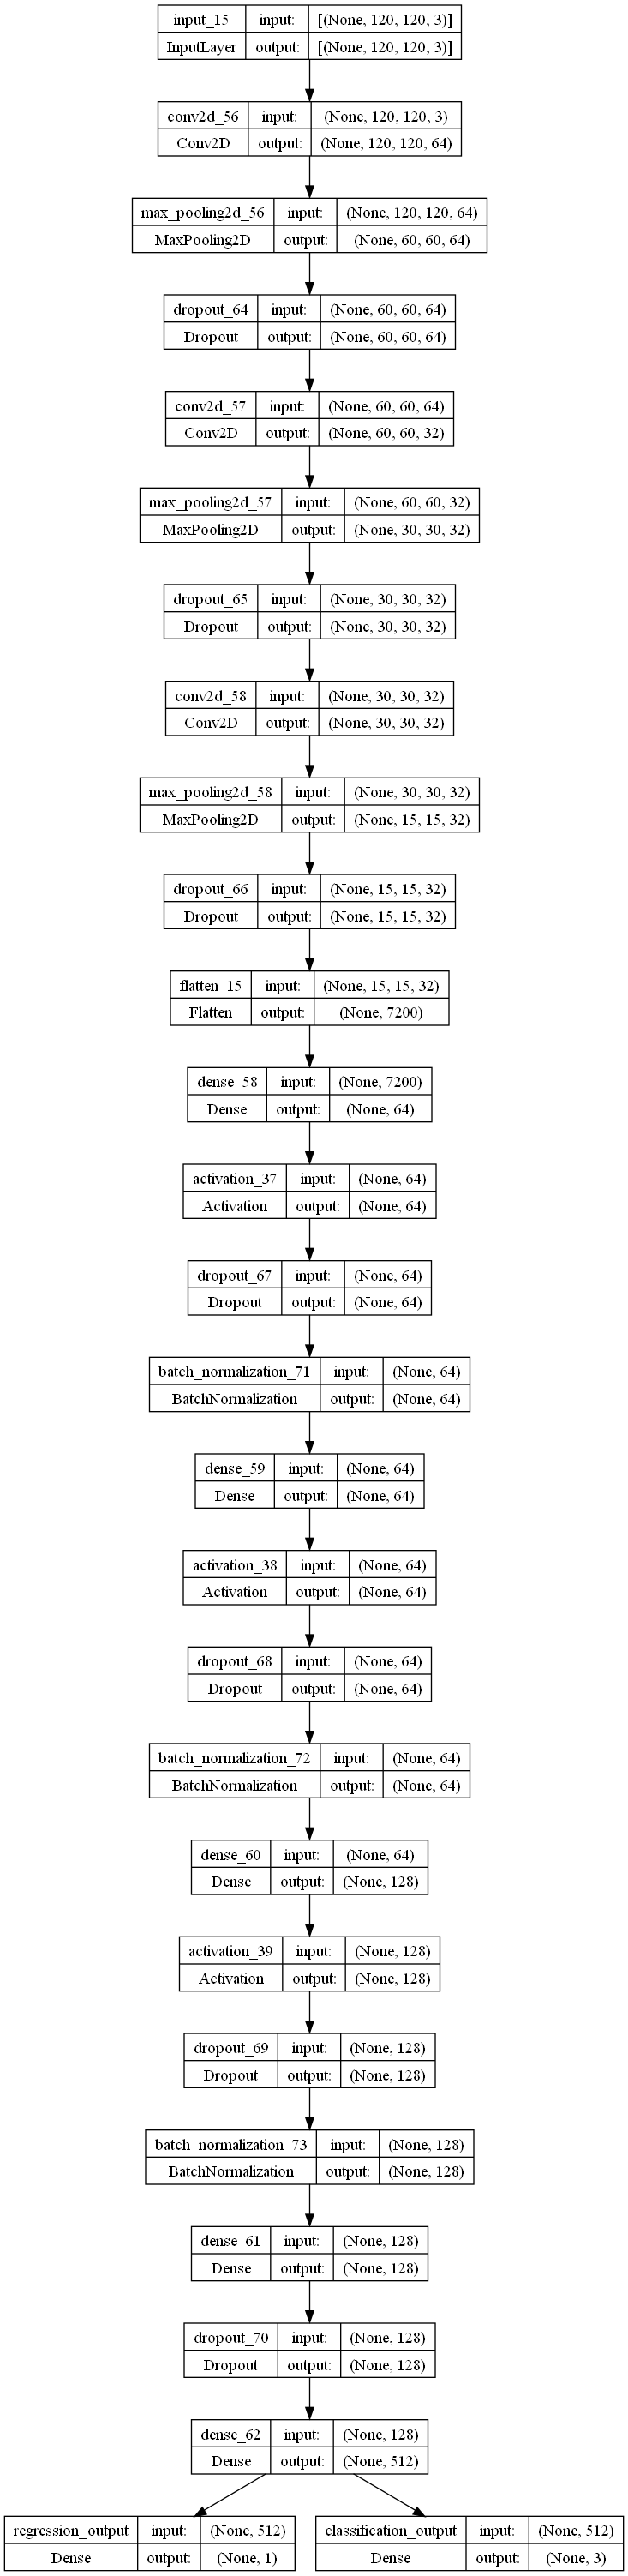

In [100]:
plot_model(age_net, to_file='/model/model.png', show_shapes=True)

In [3]:
from keras.models import load_model
age_net=load_model('/model/agenet.h5')


from keras.models import load_model
age_net_reg=load_model('/model/agenet_reg.h5')

age_net_class=load_model('/model/agenet_class.h5')

In [23]:
age_net.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 112, 112, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [35]:

n_folds=10



#save the model history in a list after fitting so that we can plot later
model_history = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet.h5', verbose=1, save_best_only=True)

  model_history=age_net.fit(x_train, [y_train_reg,y_train_class],validation_data=(x_val,[y_val_reg,y_val_class]), epochs=20, batch_size=32,verbose=2,callbacks=[early_stopping, model_checkpoint],shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/20

Epoch 1: val_loss improved from inf to 2.24904, saving model to /model\agenet.h5
252/252 - 332s - loss: 3.2117 - regression_output_loss: 3.0397 - classification_output_loss: 0.1721 - regression_output_mae: 1.1636 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0615 - classification_output_accuracy: 0.9367 - val_loss: 2.2490 - val_regression_output_loss: 2.1119 - val_classification_output_loss: 0.1372 - val_regression_output_mae: 0.9682 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0662 - val_classification_output_accuracy: 0.9704 - 332s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_loss did not improve from 2.24904
252/252 - 361s - loss: 3.0672 - regression_output_loss: 2.8983 - classification_output_loss: 0.1689 - regression_output_mae: 1.1535 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0593 - classification_output_accuracy: 0.9408 - val_loss: 2.3848 - val_regression_output_loss: 2.2552 - val_

Epoch 9/20

Epoch 9: val_loss did not improve from 2.44792
252/252 - 336s - loss: 3.4647 - regression_output_loss: 3.2987 - classification_output_loss: 0.1661 - regression_output_mae: 1.1989 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0598 - classification_output_accuracy: 0.9409 - val_loss: 2.9911 - val_regression_output_loss: 2.8218 - val_classification_output_loss: 0.1693 - val_regression_output_mae: 1.1489 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0604 - val_classification_output_accuracy: 0.9452 - 336s/epoch - 1s/step
Epoch 10/20

Epoch 10: val_loss did not improve from 2.44792
252/252 - 329s - loss: 3.4265 - regression_output_loss: 3.2534 - classification_output_loss: 0.1731 - regression_output_mae: 1.2041 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0607 - classification_output_accuracy: 0.9403 - val_loss: 2.9932 - val_regression_output_loss: 2.8385 - val_classification_output_loss: 0.15


Epoch 1: val_loss improved from inf to 2.31711, saving model to /model\agenet.h5
252/252 - 340s - loss: 3.0443 - regression_output_loss: 2.8880 - classification_output_loss: 0.1563 - regression_output_mae: 1.1367 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0560 - classification_output_accuracy: 0.9454 - val_loss: 2.3171 - val_regression_output_loss: 2.1851 - val_classification_output_loss: 0.1321 - val_regression_output_mae: 0.9820 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0554 - val_classification_output_accuracy: 0.9630 - 340s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_loss did not improve from 2.31711
252/252 - 339s - loss: 2.9658 - regression_output_loss: 2.8077 - classification_output_loss: 0.1582 - regression_output_mae: 1.1204 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0556 - classification_output_accuracy: 0.9456 - val_loss: 3.3193 - val_regression_output_loss: 3.1154 - val_classificat

Epoch 2/20

Epoch 2: val_loss improved from 2.47588 to 2.30587, saving model to /model\agenet.h5
252/252 - 339s - loss: 2.8813 - regression_output_loss: 2.7307 - classification_output_loss: 0.1506 - regression_output_mae: 1.1118 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0542 - classification_output_accuracy: 0.9460 - val_loss: 2.3059 - val_regression_output_loss: 2.1613 - val_classification_output_loss: 0.1445 - val_regression_output_mae: 0.9582 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0586 - val_classification_output_accuracy: 0.9626 - 339s/epoch - 1s/step
Epoch 3/20

Epoch 3: val_loss improved from 2.30587 to 2.30110, saving model to /model\agenet.h5
252/252 - 338s - loss: 2.9539 - regression_output_loss: 2.7983 - classification_output_loss: 0.1556 - regression_output_mae: 1.1232 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0529 - classification_output_accuracy: 0.9485 - val_loss: 2.3011 -

Epoch 4/20

Epoch 4: val_loss did not improve from 2.37841
252/252 - 339s - loss: 2.9369 - regression_output_loss: 2.7727 - classification_output_loss: 0.1641 - regression_output_mae: 1.1114 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0560 - classification_output_accuracy: 0.9471 - val_loss: 2.5151 - val_regression_output_loss: 2.3814 - val_classification_output_loss: 0.1337 - val_regression_output_mae: 1.0531 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0589 - val_classification_output_accuracy: 0.9687 - 339s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 2.37841
252/252 - 340s - loss: 2.8037 - regression_output_loss: 2.6529 - classification_output_loss: 0.1508 - regression_output_mae: 1.0984 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0535 - classification_output_accuracy: 0.9473 - val_loss: 2.5955 - val_regression_output_loss: 2.4429 - val_classification_output_loss: 0.1526

Epoch 10/20

Epoch 10: val_loss did not improve from 2.42329
252/252 - 339s - loss: 3.5272 - regression_output_loss: 3.3564 - classification_output_loss: 0.1708 - regression_output_mae: 1.2235 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0598 - classification_output_accuracy: 0.9410 - val_loss: 3.0866 - val_regression_output_loss: 2.9230 - val_classification_output_loss: 0.1636 - val_regression_output_mae: 1.1185 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0727 - val_classification_output_accuracy: 0.9630 - 339s/epoch - 1s/step
Epoch 11/20

Epoch 11: val_loss did not improve from 2.42329
252/252 - 338s - loss: 3.6345 - regression_output_loss: 3.4509 - classification_output_loss: 0.1837 - regression_output_mae: 1.2310 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0637 - classification_output_accuracy: 0.9365 - val_loss: 2.6213 - val_regression_output_loss: 2.4916 - val_classification_output_loss: 0.

Epoch 11/20

Epoch 11: val_loss did not improve from 2.29027
252/252 - 336s - loss: 2.9088 - regression_output_loss: 2.7501 - classification_output_loss: 0.1587 - regression_output_mae: 1.0963 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0547 - classification_output_accuracy: 0.9451 - val_loss: 2.3595 - val_regression_output_loss: 2.2280 - val_classification_output_loss: 0.1315 - val_regression_output_mae: 0.9925 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.0570 - val_classification_output_accuracy: 0.9613 - 336s/epoch - 1s/step
Epoch 12/20

Epoch 12: val_loss did not improve from 2.29027
252/252 - 331s - loss: 2.8836 - regression_output_loss: 2.7384 - classification_output_loss: 0.1452 - regression_output_mae: 1.1010 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0509 - classification_output_accuracy: 0.9517 - val_loss: 3.2983 - val_regression_output_loss: 3.1310 - val_classification_output_loss: 0.

Epoch 11/20

Epoch 11: val_loss did not improve from 2.31589
252/252 - 337s - loss: 3.1787 - regression_output_loss: 3.0219 - classification_output_loss: 0.1568 - regression_output_mae: 1.1432 - regression_output_accuracy: 0.0000e+00 - classification_output_mae: 0.0536 - classification_output_accuracy: 0.9463 - val_loss: 8.9631 - val_regression_output_loss: 8.4858 - val_classification_output_loss: 0.4773 - val_regression_output_mae: 2.0002 - val_regression_output_accuracy: 0.0000e+00 - val_classification_output_mae: 0.1083 - val_classification_output_accuracy: 0.8343 - 337s/epoch - 1s/step
Training on Fold:  10






In [36]:






n_folds=10



#save the model history in a list after fitting so that we can plot leter
model_historyB = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5 ,restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet_reg.h5', verbose=1, save_best_only=True)
  model_historyB=age_net_reg.fit(x_train, y_train_reg, epochs=20, batch_size=32, verbose=2,callbacks=[early_stopping,model_checkpoint],validation_data=(x_val,y_val_reg) ,shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/20

Epoch 1: val_loss improved from inf to 2.05771, saving model to /model\agenet_reg.h5
252/252 - 344s - loss: 3.1841 - mae: 1.1647 - val_loss: 2.0577 - val_mae: 0.9801 - 344s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_loss did not improve from 2.05771
252/252 - 342s - loss: 2.9323 - mae: 1.1379 - val_loss: 2.5807 - val_mae: 1.0722 - 342s/epoch - 1s/step
Epoch 3/20

Epoch 3: val_loss improved from 2.05771 to 1.93165, saving model to /model\agenet_reg.h5
252/252 - 340s - loss: 2.9111 - mae: 1.1248 - val_loss: 1.9316 - val_mae: 0.9151 - 340s/epoch - 1s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 1.93165
252/252 - 339s - loss: 2.8527 - mae: 1.1135 - val_loss: 2.5726 - val_mae: 1.0624 - 339s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 1.93165
252/252 - 338s - loss: 2.6622 - mae: 1.0939 - val_loss: 2.0344 - val_mae: 0.9375 - 338s/epoch - 1s/step
Epoch 6/20

Epoch 6: val_loss did not improve from 1.93165
252/252 - 340s - loss: 2.6379 - mae: 1.0949 - 

Epoch 3/20

Epoch 3: val_loss improved from 2.14047 to 1.94325, saving model to /model\agenet_reg.h5
252/252 - 338s - loss: 2.6986 - mae: 1.0969 - val_loss: 1.9432 - val_mae: 0.9521 - 338s/epoch - 1s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 1.94325
252/252 - 338s - loss: 2.4608 - mae: 1.0526 - val_loss: 2.1251 - val_mae: 1.0067 - 338s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss improved from 1.94325 to 1.59228, saving model to /model\agenet_reg.h5
252/252 - 340s - loss: 2.2657 - mae: 1.0118 - val_loss: 1.5923 - val_mae: 0.8286 - 340s/epoch - 1s/step
Epoch 6/20

Epoch 6: val_loss improved from 1.59228 to 1.50847, saving model to /model\agenet_reg.h5
252/252 - 338s - loss: 2.0968 - mae: 0.9822 - val_loss: 1.5085 - val_mae: 0.8354 - 338s/epoch - 1s/step
Epoch 7/20

Epoch 7: val_loss did not improve from 1.50847
252/252 - 340s - loss: 2.0324 - mae: 0.9778 - val_loss: 1.7744 - val_mae: 0.8899 - 340s/epoch - 1s/step
Epoch 8/20

Epoch 8: val_loss did not improve from 1.50847


252/252 - 344s - loss: 2.0625 - mae: 0.9821 - val_loss: 1.7360 - val_mae: 0.8637 - 344s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 1.73600
252/252 - 340s - loss: 2.0479 - mae: 0.9617 - val_loss: 2.6059 - val_mae: 1.0701 - 340s/epoch - 1s/step
Epoch 6/20

Epoch 6: val_loss improved from 1.73600 to 1.55525, saving model to /model\agenet_reg.h5
252/252 - 338s - loss: 1.9559 - mae: 0.9491 - val_loss: 1.5553 - val_mae: 0.8245 - 338s/epoch - 1s/step
Epoch 7/20

Epoch 7: val_loss did not improve from 1.55525
252/252 - 340s - loss: 2.0324 - mae: 0.9516 - val_loss: 2.0568 - val_mae: 0.9436 - 340s/epoch - 1s/step
Epoch 8/20

Epoch 8: val_loss did not improve from 1.55525
252/252 - 340s - loss: 1.9533 - mae: 0.9302 - val_loss: 1.7563 - val_mae: 0.8490 - 340s/epoch - 1s/step
Epoch 9/20

Epoch 9: val_loss did not improve from 1.55525
252/252 - 337s - loss: 1.9299 - mae: 0.9325 - val_loss: 2.2157 - val_mae: 1.0284 - 337s/epoch - 1s/step
Epoch 10/20

Epoch 10: val_loss did not

In [37]:
#age_net_class=load_model('../model/afrinet-cnn-class.h5')



n_folds=10



#save the model history in a list after fitting so that we can plot later
model_historyX = [] 

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_checkpoint = ModelCheckpoint('/model/agenet_class.h5', verbose=1, save_best_only=True)
  model_historyX=age_net_class.fit(x_train, y_train_class, epochs=20, batch_size=32, verbose=2,callbacks=[early_stopping,model_checkpoint],validation_data=(x_val,y_val_class), shuffle=True)
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.14050, saving model to /model\agenet_class.h5
252/252 - 344s - loss: 0.1121 - accuracy: 0.9331 - val_loss: 0.1405 - val_accuracy: 0.9204 - 344s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_loss did not improve from 0.14050
252/252 - 344s - loss: 0.0975 - accuracy: 0.9419 - val_loss: 0.8201 - val_accuracy: 0.5235 - 344s/epoch - 1s/step
Epoch 3/20

Epoch 3: val_loss improved from 0.14050 to 0.08930, saving model to /model\agenet_class.h5
252/252 - 351s - loss: 0.0973 - accuracy: 0.9401 - val_loss: 0.0893 - val_accuracy: 0.9370 - 351s/epoch - 1s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 0.08930
252/252 - 352s - loss: 0.0996 - accuracy: 0.9411 - val_loss: 0.1000 - val_accuracy: 0.9330 - 352s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss improved from 0.08930 to 0.05921, saving model to /model\agenet_class.h5
252/252 - 348s - loss: 0.0875 - accuracy: 0.9436 - val_loss: 0.0592 - val_accuracy: 0.9687 - 348s/epoch - 1s/step
Epoch 6

Epoch 14/20

Epoch 14: val_loss did not improve from 0.05609
252/252 - 349s - loss: 0.0621 - accuracy: 0.9621 - val_loss: 0.0720 - val_accuracy: 0.9578 - 349s/epoch - 1s/step
Epoch 15/20

Epoch 15: val_loss did not improve from 0.05609
252/252 - 351s - loss: 0.0596 - accuracy: 0.9641 - val_loss: 0.0858 - val_accuracy: 0.9522 - 351s/epoch - 1s/step
Epoch 16/20

Epoch 16: val_loss did not improve from 0.05609
252/252 - 347s - loss: 0.0555 - accuracy: 0.9671 - val_loss: 0.0692 - val_accuracy: 0.9539 - 347s/epoch - 1s/step
Training on Fold:  3




Epoch 1/20

Epoch 1: val_loss improved from inf to 0.09254, saving model to /model\agenet_class.h5
252/252 - 350s - loss: 0.0646 - accuracy: 0.9622 - val_loss: 0.0925 - val_accuracy: 0.9409 - 350s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_loss improved from 0.09254 to 0.08686, saving model to /model\agenet_class.h5
252/252 - 345s - loss: 0.0579 - accuracy: 0.9632 - val_loss: 0.0869 - val_accuracy: 0.9509 - 345s/epoch - 1s/step
Epoch 3/20

Epoch 3:


Epoch 1: val_loss improved from inf to 0.09744, saving model to /model\agenet_class.h5
252/252 - 349s - loss: 0.0552 - accuracy: 0.9672 - val_loss: 0.0974 - val_accuracy: 0.9413 - 349s/epoch - 1s/step
Epoch 2/20

Epoch 2: val_loss improved from 0.09744 to 0.07486, saving model to /model\agenet_class.h5
252/252 - 346s - loss: 0.0571 - accuracy: 0.9682 - val_loss: 0.0749 - val_accuracy: 0.9557 - 346s/epoch - 1s/step
Epoch 3/20

Epoch 3: val_loss improved from 0.07486 to 0.05523, saving model to /model\agenet_class.h5
252/252 - 348s - loss: 0.0501 - accuracy: 0.9719 - val_loss: 0.0552 - val_accuracy: 0.9704 - 348s/epoch - 1s/step
Epoch 4/20

Epoch 4: val_loss did not improve from 0.05523
252/252 - 351s - loss: 0.0543 - accuracy: 0.9691 - val_loss: 0.0583 - val_accuracy: 0.9700 - 351s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.05523
252/252 - 338s - loss: 0.0501 - accuracy: 0.9749 - val_loss: 0.0630 - val_accuracy: 0.9665 - 338s/epoch - 1s/step
Epoch 6/20

Epoch 

Epoch 3/20

Epoch 3: val_loss improved from 0.07977 to 0.06399, saving model to /model\agenet_class.h5
252/252 - 346s - loss: 0.0346 - accuracy: 0.9826 - val_loss: 0.0640 - val_accuracy: 0.9678 - 346s/epoch - 1s/step
Epoch 4/20

Epoch 4: val_loss improved from 0.06399 to 0.05059, saving model to /model\agenet_class.h5
252/252 - 346s - loss: 0.0335 - accuracy: 0.9816 - val_loss: 0.0506 - val_accuracy: 0.9813 - 346s/epoch - 1s/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.05059
252/252 - 337s - loss: 0.0344 - accuracy: 0.9822 - val_loss: 0.0508 - val_accuracy: 0.9748 - 337s/epoch - 1s/step
Epoch 6/20

Epoch 6: val_loss did not improve from 0.05059
252/252 - 350s - loss: 0.0349 - accuracy: 0.9825 - val_loss: 0.0904 - val_accuracy: 0.9526 - 350s/epoch - 1s/step
Epoch 7/20

Epoch 7: val_loss did not improve from 0.05059
252/252 - 347s - loss: 0.0420 - accuracy: 0.9769 - val_loss: 0.0538 - val_accuracy: 0.9739 - 347s/epoch - 1s/step
Epoch 8/20

Epoch 8: val_loss did not improve f

In [18]:
yhat = age_net_reg.predict(x_test)

true_ages=y_test_reg
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net_reg.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat)
print("Test R^2 Score: {:.5f}".format(r2))




36/36 [==============================] - 10s 227ms/step
The MSE 1.2482836959981651
The MAE 0.8110255888500595
this is the rmse 1.1172661706138627
Test R^2 Score: 0.95011


In [19]:
yhat1, yhat2 = age_net.predict(x_test)

true_ages=y_test_reg
from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat1)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat1)
print ("The MAE",mae)



rmse = np.sqrt(mse)

print ("this is the rmse",rmse )

rmse = np.sqrt(age_net.evaluate(x_test, verbose=0))

r2 = r2_score(true_ages, yhat1)
print("Test R^2 Score: {:.5f}".format(r2))


yhat1.shape

36/36 [==============================] - 10s 233ms/step
The MSE 1.7073982692195786
The MAE 0.9042468754547146
this is the rmse 1.3066745077560742
Test R^2 Score: 0.93177


(1151, 1)

In [20]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat2, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       1.00      0.74      0.85       182
           2       0.95      1.00      0.97       919

    accuracy                           0.96      1151
   macro avg       0.98      0.90      0.93      1151
weighted avg       0.96      0.96      0.95      1151



In [22]:
 yhat = age_net_class.predict(x_test)


predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1) 
classreport = classification_report(true_classes, predicted_classes)
print (classreport)


36/36 [==============================] - 9s 182ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.99      0.95      0.97       182
           2       0.99      1.00      1.00       919

    accuracy                           0.99      1151
   macro avg       0.99      0.98      0.99      1151
weighted avg       0.99      0.99      0.99      1151



In [1]:
labels =["(10-12)",
        "(13-17)" ,# index 0
        "(18-30)"     # index 1
        ]

36/36 [==============================] - 6s 138ms/step


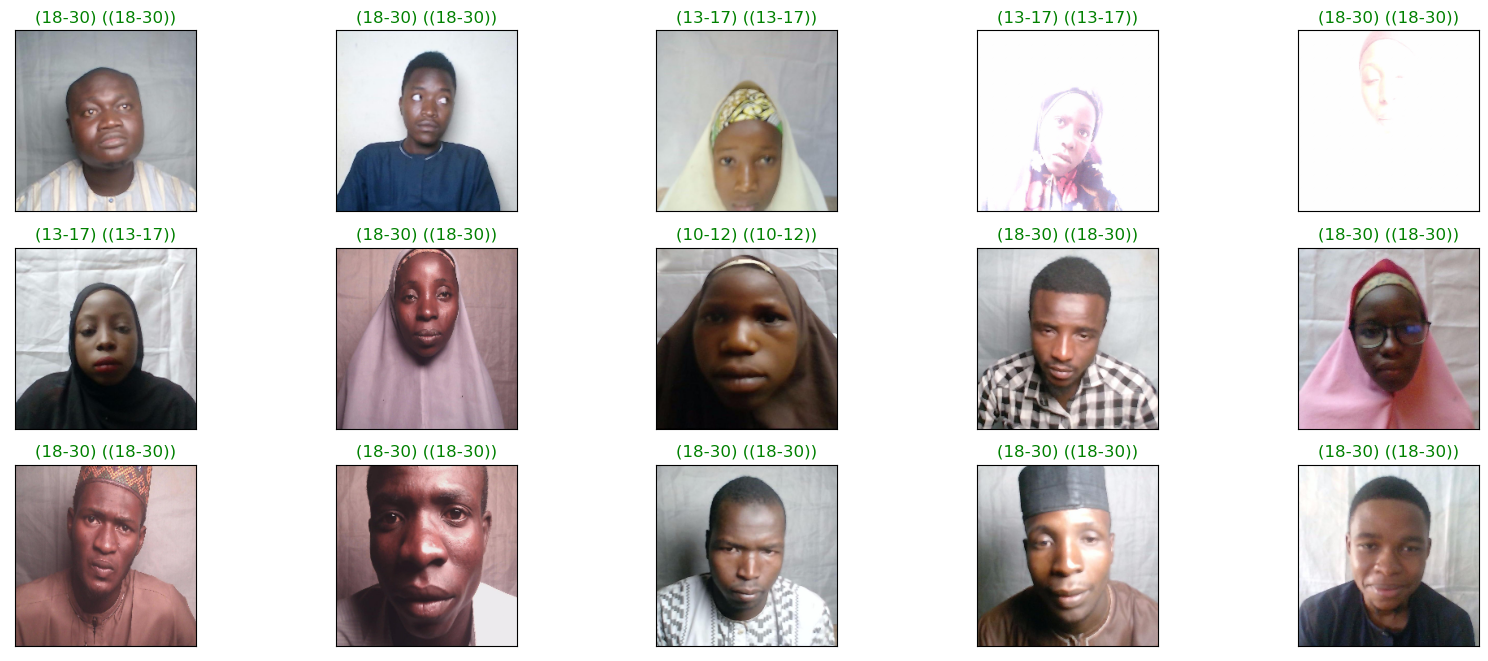

In [26]:
y_hat = age_net_class.predict(x_test)


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

36/36 [==============================] - 7s 139ms/step


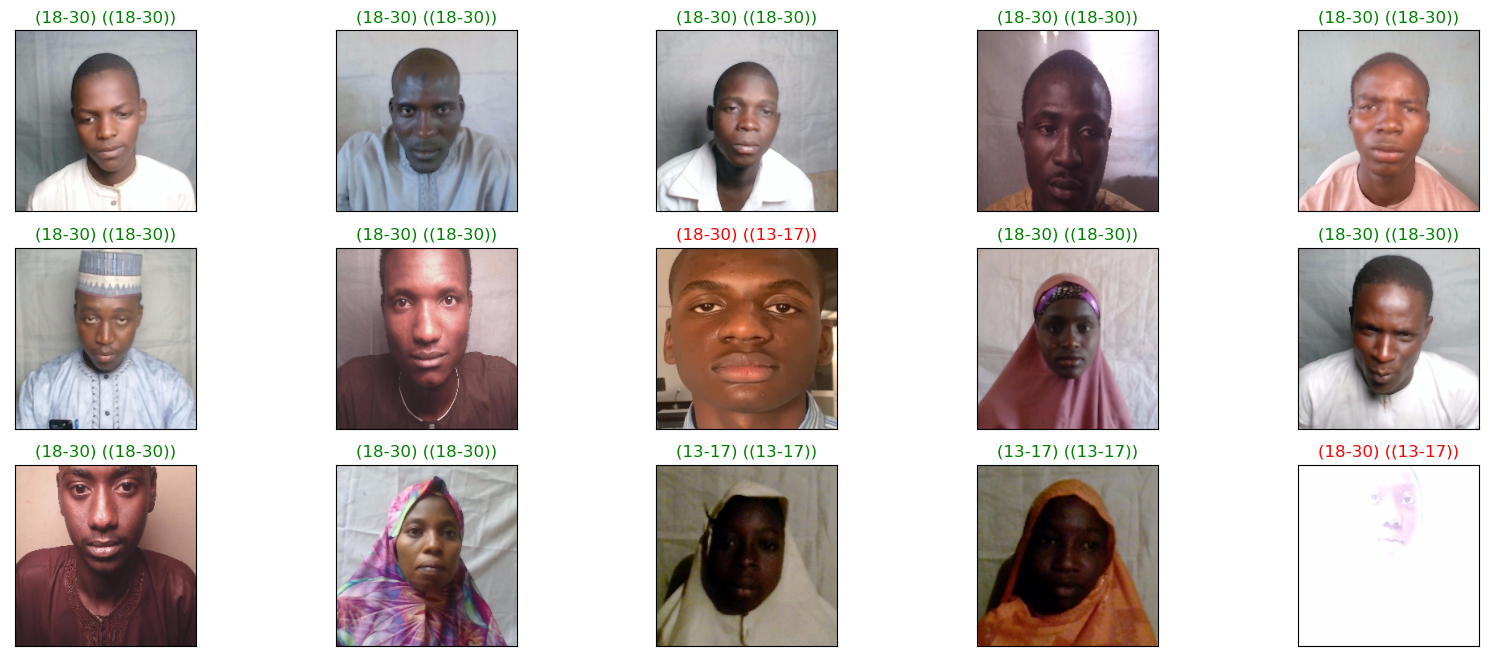

In [28]:
y_hat,y_hat2 = age_net.predict(x_test)


# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat2[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

36/36 [==============================] - 10s 201ms/step


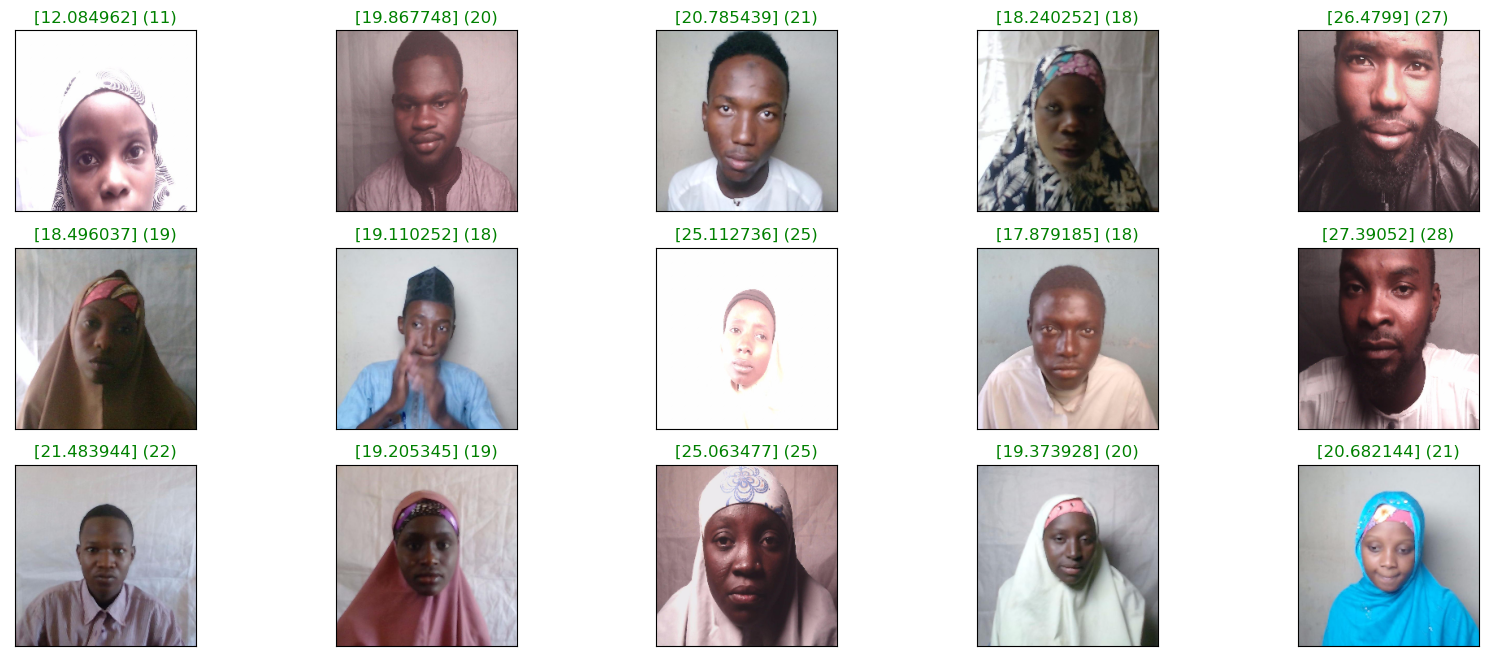

In [37]:
#PREDICTION MODEL ON TESTDATA (REGRESSION OUTPUT)
import numpy 
y_hat = age_net_reg.predict(x_test)
y_test_label = numpy.array( y_test_reg)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = y_hat[index]
    true_index = y_test_label[index]

    ax.set_title("{} ({})".format(predict_index, 
                                  true_index),
                                  color=("green"))                   
plt.show()

In [35]:
type(y_hat)

numpy.ndarray

36/36 [==============================] - 9s 189ms/step
[[ 50   0   0]
 [  1 173   8]
 [  0   1 918]]
(1151, 3)


<AxesSubplot:>

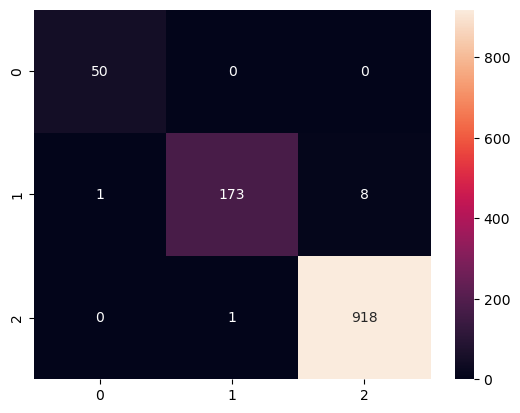

In [41]:

yhat = age_net_class.predict(x_test)
true_ages=y_test_class

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages, axis=1)
cm_class = confusion_matrix(y_test, y_pred)
print(cm_class)
print(yhat2.shape)
import seaborn as sns
sns.heatmap(cm_class, fmt="d", annot=True)

[[ 48   0   2]
 [  1 135  46]
 [  0   0 919]]
(1151, 3)


<AxesSubplot:>

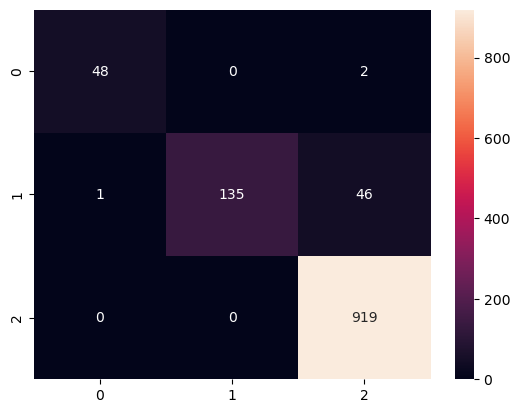

In [42]:
y_pred=np.argmax(yhat2, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat2.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)
